<a href="https://colab.research.google.com/github/RanieriWill/Challenge_Data_Science_Alura/blob/main/Desafio_Alura_Data_Science_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Data Science Alura

**Contextualização e Objetivo**

Você foi contratado(a) como cientista de dados pela operadora de telecomunicações Alura Voz. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se reduzir a Taxa de Evasão de Clientes, conhecido como Churn Rate. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, você solicita o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

## Legenda Dados

* **customerID**: número de identificação único de cada cliente
* **Churn**: se o cliente deixou ou não a empresa
* **gender**: gênero (masculino e feminino)
* **SeniorCitizen**: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* **Partner**: se o cliente possui ou não um parceiro ou parceira
* **Dependents**: se o cliente possui ou não dependentes
* **tenure**: meses de contrato do cliente
* **PhoneService**: assinatura de serviço telefônico
* **MultipleLines**: assisnatura de mais de uma linha de telefone
* **InternetService**: assinatura de um provedor internet
* **OnlineSecurity**: assinatura adicional de segurança online
* **OnlineBackup**: assinatura adicional de backup online
* **DeviceProtection**: assinatura adicional de proteção no dispositivo
* **TechSupport**: assinatura adicional de suporte técnico, menos tempo de espera
* **StreamingTV**: assinatura de TV a cabo
* **StreamingMovies**: assinatura de streaming de filmes
* **Contract**: tipo de contrato
* **PaperlessBilling**: se o cliente prefere receber online a fatura
* **PaymentMethod**: forma de pagamento
* **Charges.Monthly**: total de todos os serviços do cliente por mês
* **Charges.Total**: total gasto pelo cliente

# Entender as Informações

## Bibliotecas import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  Base de Dados(JSON)


In [2]:
dataset = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

dataset

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset_customer = pd.json_normalize(dataset.customer)
dataset_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [5]:
dataset_phone = pd.json_normalize(dataset.phone)
dataset_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
dataset_internet = pd.json_normalize(dataset.internet)
dataset_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
dataset_account = pd.json_normalize(dataset.account)
dataset_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
dataset.shape

(7267, 6)

# Verificando os Tipos de Dados

In [9]:
dataset


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [10]:
dataset_1 = pd.concat([dataset['customerID'],dataset['Churn'],dataset_customer, dataset_phone, dataset_internet, dataset_account], axis = 1)
dataset_1.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [11]:
#Tradução Colunas
Colunas = {'customerID': 'ID', 'Churn': 'Churn', 'gender': 'Genero', 'SeniorCitizen': 'Idade', 'Partner': 'Parceiro', 'Dependents': 'Dependentes', 'tenure': 'Tempo_Contrato', 
            'PhoneService': 'Servico_Telefonico', 'MultipleLines': 'Multiplas_Linhas', 'InternetService': 'Servico_Internet', 'OnlineSecurity': 'Seguranca_Online', 'OnlineBackup': 'Backup_Online', 
            'DeviceProtection': 'Protecao_Dispositivo', 'TechSupport': 'Suporte_Tecnico', 'StreamingTV': 'StreamingTV', 'StreamingMovies': 'Streaming_Filmes', 'Contract': 'Contrato',
            'PaperlessBilling': 'Fatura_Online', 'PaymentMethod': 'Metodo_Pagamento', 'Charges.Monthly': 'Conta_Mensal', 'Charges.Total': 'Conta_Total'}

dataset_1.rename(columns = Colunas, inplace = True)


In [12]:
dataset_1

,ID,Churn,Genero,Idade,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,StreamingTV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Conta_Mensal,Conta_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idade                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Tempo_Contrato        7267 non-null   int64  
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  StreamingTV           7267 non-null   object 
 15  Streaming_Filmes     

In [14]:
pd.DataFrame(dataset_1.dtypes)

,0
ID,object
Churn,object
Genero,object
Idade,int64
Parceiro,object
Dependentes,object
Tempo_Contrato,int64
Servico_Telefonico,object
Multiplas_Linhas,object
Servico_Internet,object


# Tratando os Dados

In [15]:
# Verificando se há ID duplicados
ID = dataset_1['ID']
pd.DataFrame(ID.drop_duplicates())

,ID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


## Churn

In [16]:
dataset_1['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [17]:
dataset_1.Churn.value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [18]:
dataset_1.query('Churn == ""')

,ID,Churn,Genero,Idade,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,StreamingTV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Conta_Mensal,Conta_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [19]:
#Eliminando dados indesejados
dataset_1 = dataset_1.query('Churn != ""')

In [20]:
dataset_1.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Verificando outras Colunas

In [21]:
dataset_1['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
dataset_1['Idade'].unique()

array([0, 1])

In [23]:
dataset_1['Parceiro'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
dataset_1['Dependentes'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
dataset_1['Tempo_Contrato'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [26]:
dataset_1['Servico_Telefonico'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
dataset_1['Multiplas_Linhas'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [28]:
dataset_1['Servico_Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [29]:
dataset_1['Seguranca_Online'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
dataset_1['Backup_Online'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [31]:
dataset_1['Protecao_Dispositivo'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
dataset_1['Suporte_Tecnico'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [33]:
dataset_1['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [34]:
dataset_1['Streaming_Filmes'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
dataset_1['Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [36]:
dataset_1['Fatura_Online'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
dataset_1['Metodo_Pagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [38]:
dataset_1['Conta_Mensal'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [39]:
dataset_1['Conta_Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

# Análise dos Dados

Realizado um filtro dos clientes que cancelaram os serviços e realizado algumas análises em busca de um padrão entre esses clientes

## Não Cliente por Gênero


Verificando nossos dados podemos concluir que o Gênero não é um fator relevante, visto que apresentam uma porcentagem muito proxima 

In [40]:
dataset_1.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [41]:
dadosChurn = dataset_1.query('Churn == "Yes"')
dadosChurn.shape[0]

1869

In [42]:
Churn_Genero = dadosChurn.Genero.value_counts()
Churn_Genero

Female    939
Male      930
Name: Genero, dtype: int64

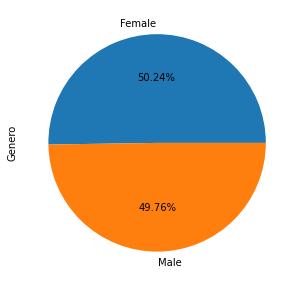

In [43]:
Churn_Genero.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Idade

Verificando nossos dados podemos concluir que a maior parte dos clientes que cancelaram o serviço com a empresa tem idade inferior a 65 anos

In [44]:
Churn_Idade = dadosChurn.Idade.value_counts()
Churn_Idade

0    1393
1     476
Name: Idade, dtype: int64

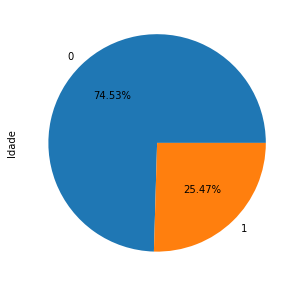

In [45]:
Churn_Idade.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Parceiro e Dependente

Verificando nossos dados podemos concluir que a maior parte dos clientes que cancelaram o serviço com a empresa estão solteiros(64,21%) e não possuem dependentes(82,56%)


In [46]:
Churn_Parceiro = dadosChurn.Parceiro.value_counts()
Churn_Parceiro

No     1200
Yes     669
Name: Parceiro, dtype: int64

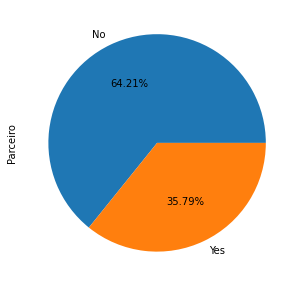

In [47]:
Churn_Parceiro.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [48]:
Churn_Dependentes = dadosChurn.Dependentes.value_counts()
Churn_Dependentes

No     1543
Yes     326
Name: Dependentes, dtype: int64

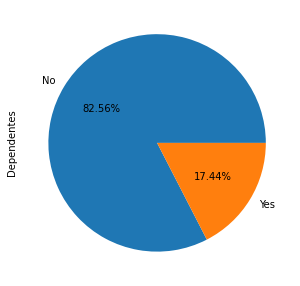

In [49]:
Churn_Dependentes.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Tempo Contrato


Verificando nossos dados podemos concluir que a maior parte dos clientes cancelaram os serviços apos poucos meses de uso, sendo 41,95% em 6 meses ou menos, em um periodo de 1 ano essa porcentagem sobe para 55,49%

In [50]:
TContrato = [0,6,12,18,24,30,36,48,60,72,84]

In [51]:
Tempo_Contrato = pd.cut(dadosChurn.Tempo_Contrato,TContrato)
Tempo_Contrato

2         (0, 6]
3       (12, 18]
4         (0, 6]
18      (36, 48]
19        (0, 6]
          ...   
7243    (18, 24]
7246     (6, 12]
7260      (0, 6]
7261      (0, 6]
7263    (18, 24]
Name: Tempo_Contrato, Length: 1869, dtype: category
Categories (10, interval[int64, right]): [(0, 6] < (6, 12] < (12, 18] < (18, 24] ... (36, 48] <
                                          (48, 60] < (60, 72] < (72, 84]]

In [52]:
Churn_TContrato = pd.value_counts(Tempo_Contrato)
Churn_TContrato

(0, 6]      784
(6, 12]     253
(12, 18]    177
(36, 48]    145
(48, 60]    120
(18, 24]    117
(24, 30]     94
(60, 72]     93
(30, 36]     86
(72, 84]      0
Name: Tempo_Contrato, dtype: int64

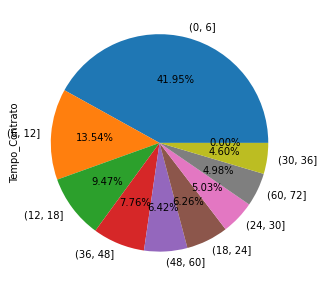

In [53]:
#Nota Pessoal (Tentar Ordenar por faixa de tempo)
Churn_TContrato.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Serviço Telefônico

In [54]:
Churn_Servico_Telefonico = dadosChurn.Servico_Telefonico.value_counts()
Churn_Servico_Telefonico

Yes    1699
No      170
Name: Servico_Telefonico, dtype: int64

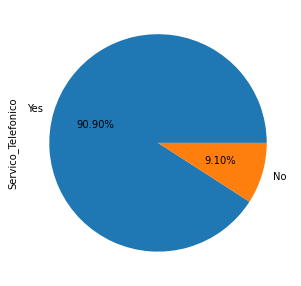

In [55]:
Churn_Servico_Telefonico.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [56]:
Churn_Multiplas_Linhas = dadosChurn.Multiplas_Linhas.value_counts()
Churn_Multiplas_Linhas

Yes                 850
No                  849
No phone service    170
Name: Multiplas_Linhas, dtype: int64

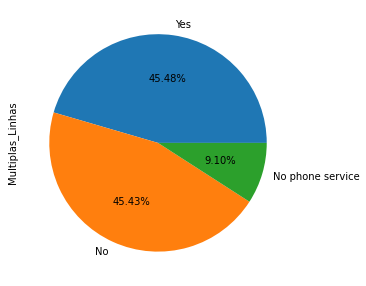

In [57]:
Churn_Multiplas_Linhas.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Serviço de Internet

In [58]:
Churn_Servico_Internet = dadosChurn.Servico_Internet.value_counts()
Churn_Servico_Internet

Fiber optic    1297
DSL             459
No              113
Name: Servico_Internet, dtype: int64

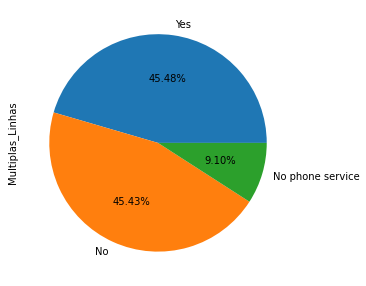

In [59]:
Churn_Multiplas_Linhas.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [60]:
Churn_Seguranca_Online = dadosChurn.Seguranca_Online.value_counts()
Churn_Seguranca_Online

No                     1461
Yes                     295
No internet service     113
Name: Seguranca_Online, dtype: int64

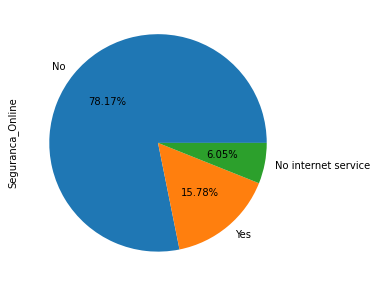

In [61]:
Churn_Seguranca_Online.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [62]:
Churn_Backup_Online = dadosChurn.Backup_Online.value_counts()
Churn_Backup_Online

No                     1233
Yes                     523
No internet service     113
Name: Backup_Online, dtype: int64

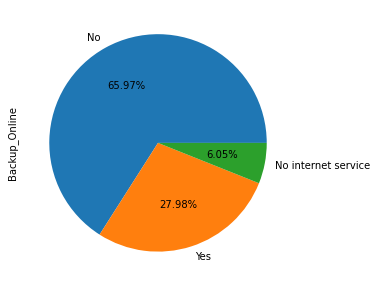

In [63]:
Churn_Backup_Online.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [64]:
Churn_Protecao_Dispositivo = dadosChurn.Protecao_Dispositivo.value_counts()
Churn_Protecao_Dispositivo

No                     1211
Yes                     545
No internet service     113
Name: Protecao_Dispositivo, dtype: int64

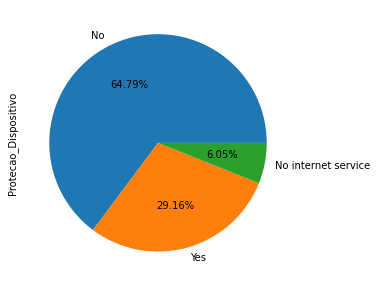

In [65]:
Churn_Protecao_Dispositivo.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [66]:
Churn_Suporte = dadosChurn.Suporte_Tecnico.value_counts()
Churn_Suporte

No                     1446
Yes                     310
No internet service     113
Name: Suporte_Tecnico, dtype: int64

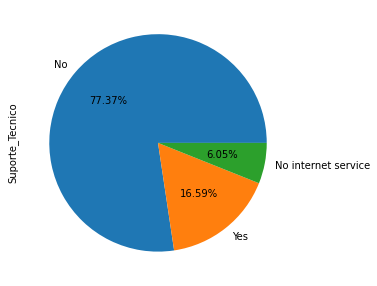

In [67]:
Churn_Suporte.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [68]:
Churn_StreamingTV = dadosChurn.StreamingTV.value_counts()
Churn_StreamingTV

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

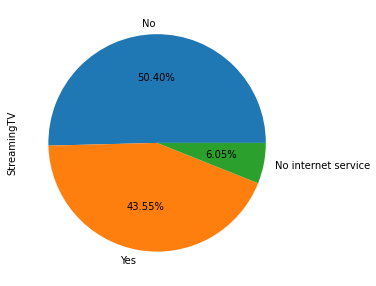

In [69]:
Churn_StreamingTV.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [70]:
Churn_Streaming_Filmes = dadosChurn.Streaming_Filmes.value_counts()
Churn_Streaming_Filmes

No                     938
Yes                    818
No internet service    113
Name: Streaming_Filmes, dtype: int64

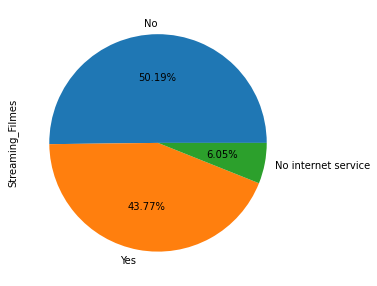

In [71]:
Churn_Streaming_Filmes.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

## Não Cliente por Contrato

In [72]:
Churn_Contrato = dadosChurn.Contrato.value_counts()
Churn_Contrato

Month-to-month    1655
One year           166
Two year            48
Name: Contrato, dtype: int64

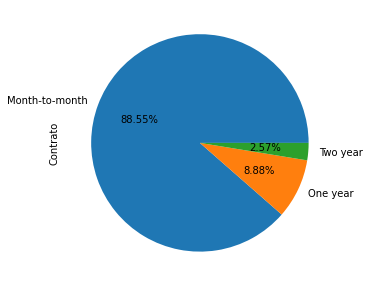

In [73]:
Churn_Contrato.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [74]:
Churn_Fatura_Online = dadosChurn.Fatura_Online.value_counts()
Churn_Fatura_Online

Yes    1400
No      469
Name: Fatura_Online, dtype: int64

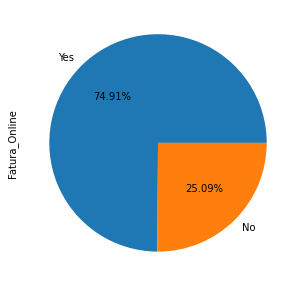

In [75]:
Churn_Fatura_Online.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [76]:
Churn_Metodo_Pagamento = dadosChurn.Metodo_Pagamento.value_counts()
Churn_Metodo_Pagamento

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: Metodo_Pagamento, dtype: int64

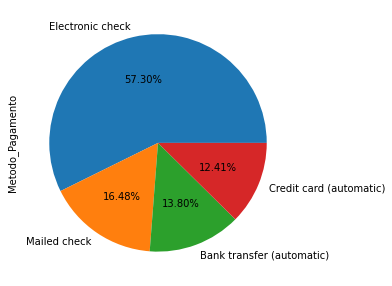

In [77]:
Churn_Metodo_Pagamento.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [78]:
CMensal = [0,20,30,40,50,60,70,80,90,100]

In [79]:
Conta_Mensal = pd.cut(dadosChurn.Conta_Mensal,CMensal )
Conta_Mensal

2        (70, 80]
3       (90, 100]
4        (80, 90]
18       (60, 70]
19       (20, 30]
          ...    
7243    (90, 100]
7246     (80, 90]
7260     (70, 80]
7261     (20, 30]
7263     (80, 90]
Name: Conta_Mensal, Length: 1869, dtype: category
Categories (9, interval[int64, right]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] ... (60, 70] <
                                         (70, 80] < (80, 90] < (90, 100]]

In [80]:
Churn_Conta_Mensal = pd.value_counts(Conta_Mensal)
Churn_Conta_Mensal

(70, 80]     361
(80, 90]     336
(90, 100]    317
(40, 50]     147
(50, 60]     129
(60, 70]     112
(20, 30]     104
(0, 20]       58
(30, 40]      52
Name: Conta_Mensal, dtype: int64

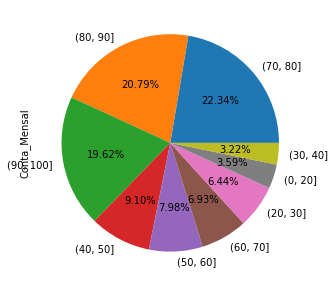

In [81]:
Churn_Conta_Mensal.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10,5))

In [82]:
CTotal = [0,100,1000,2000,3000,4000,5000,6000,7000,8000]

In [83]:
#Nota Pessoal : Converter dadosChurn.Conta_Total para float
Conta_Total = pd.cut(float(dadosChurn.Conta_Total),CTotal)
Conta_Total

TypeError: ignored

In [ ]:
Churn_Conta_Total = dadosChurn.Conta_Total.value_counts()
Churn_Conta_Total